In [1]:
from platform import release
import cv2 
import numpy as np
#takes a video and makes a gray video and returns a list of numpy arrays of the gray video data
def makeGrayVid(Video):
  frame_width = int(Video.get(3)) 
  frame_height = int(Video.get(4)) 
  size = (frame_width, frame_height)
  result = cv2.VideoWriter('gray.avi',  
            cv2.VideoWriter_fourcc(*'MJPG'), 
            10, size, 0) 
  lst=[]
 # running the loop 
  while True: 
    # extracting the frames 
    ret, img = Video.read() 
    # converting to gray-scale 
    if ret==False:
        break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    lst.append(gray)
    # write to gray-scale 
    result.write(gray)
  Video.release
  result.release
  return lst
  


In [2]:
#Frame diffrence method
#Task requirement moving object detection
from platform import release
import cv2 
import numpy as np
  

def frameDiffs(source):
 # We need to set resolutions. 
 # so, convert them from float to integer. 
 frame_width = int(source.get(3)) 
 frame_height = int(source.get(4)) 
 size = (frame_width, frame_height)
 
 resultResed = cv2.VideoWriter('Resedual.avi',  
            cv2.VideoWriter_fourcc(*'MJPG'), 
            10, size, 0) 
 lst=makeGrayVid(source)
 
 source.release()
 i=0
 while i<len(lst)-1:
    resultResed.write(lst[i+1]-lst[i])
    i=i+1   
 resultResed.release()

# reading the vedio 
video = cv2.VideoCapture('Los Angeles.mp4') 
frameDiffs(video)

In [10]:

from platform import release
import cv2 
import numpy as np
import matplotlib.pyplot as plt
def UpdateBackgroundModel(BG,Curr,Weight):
  # uses the equation to update the background
  NewBG=np.rint((1-Weight)*BG+(Weight)*Curr).astype(np.uint8)
  return NewBG
# creates a list af numpy array frames with the weightedAverage forground data 
def weightedAverage(source,weight,Threshold):
  # make a gray video of the source input 
  gray=makeGrayVid(source)
# calculate initial average of the firist 2 frames
  BG=np.average(np.array([ gray[0], gray[1] ]), axis=0)

  i=0
  fgVid=[]
  while i<len(gray)-1:
   BG=UpdateBackgroundModel(BG,gray[i],weight)
   # subtract the current bg from the current frame to get the forground
   FG=(np.rint(abs(BG-gray[i]))).astype(np.uint8)
   # threshold check "binrization"
   np.where(FG < Threshold, FG, 0*FG)
   fgVid.append(FG)
   i=i+1
  return fgVid





331


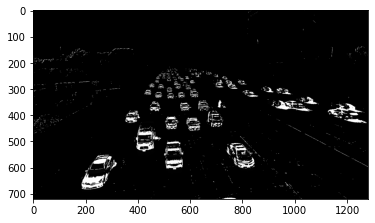

In [13]:
from platform import release
import cv2 
import numpy as np
# creates a video of the input list of numpy arrays with the same resolution as 2nd parameter video 
def makeVid(NumpyArr,Video):
  size = (int(Video.get(3)) , int(Video.get(4)))
  result = cv2.VideoWriter('grayAvg.avi',  
            cv2.VideoWriter_fourcc(*'MJPG'), 
            10, size, 0) 
 # running the loop 
  i=0
  while i<len(NumpyArr): 
   # write video
   img  = NumpyArr[i]
   result.write(img)
   i=i+1
  
  result.release()


  
video = cv2.VideoCapture('Los Angeles.mp4') 
# weight of 0.3 is used
# threshold of is used
out=weightedAverage(video,0.95,200)



gray=makeVid(out,video)
print(len(out))
plt.imshow(out[300],"gray")